### 5.4 설명가능한 CNN(eXplainable CNN)
### 5.4.1 특성 맵 시각화

In [1]:
#pip install keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3), activation='relu', kernel_size=(5,5), filters=32),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)          1

In [3]:
ins= model.inputs 
outs= model.layers[0].output  
feature_map= Model(inputs= ins, outputs= outs)  
feature_map.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 96, 32)        2432      
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


In [4]:
Model: "functional_1"

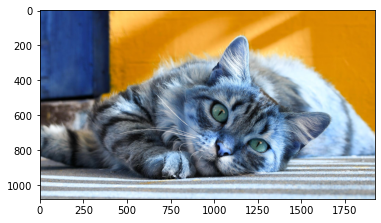

In [6]:
img=cv2.imread("./data/cat.jpg")   
plt.imshow(img)

(1, 100, 100, 3)
(1, 96, 96, 32)


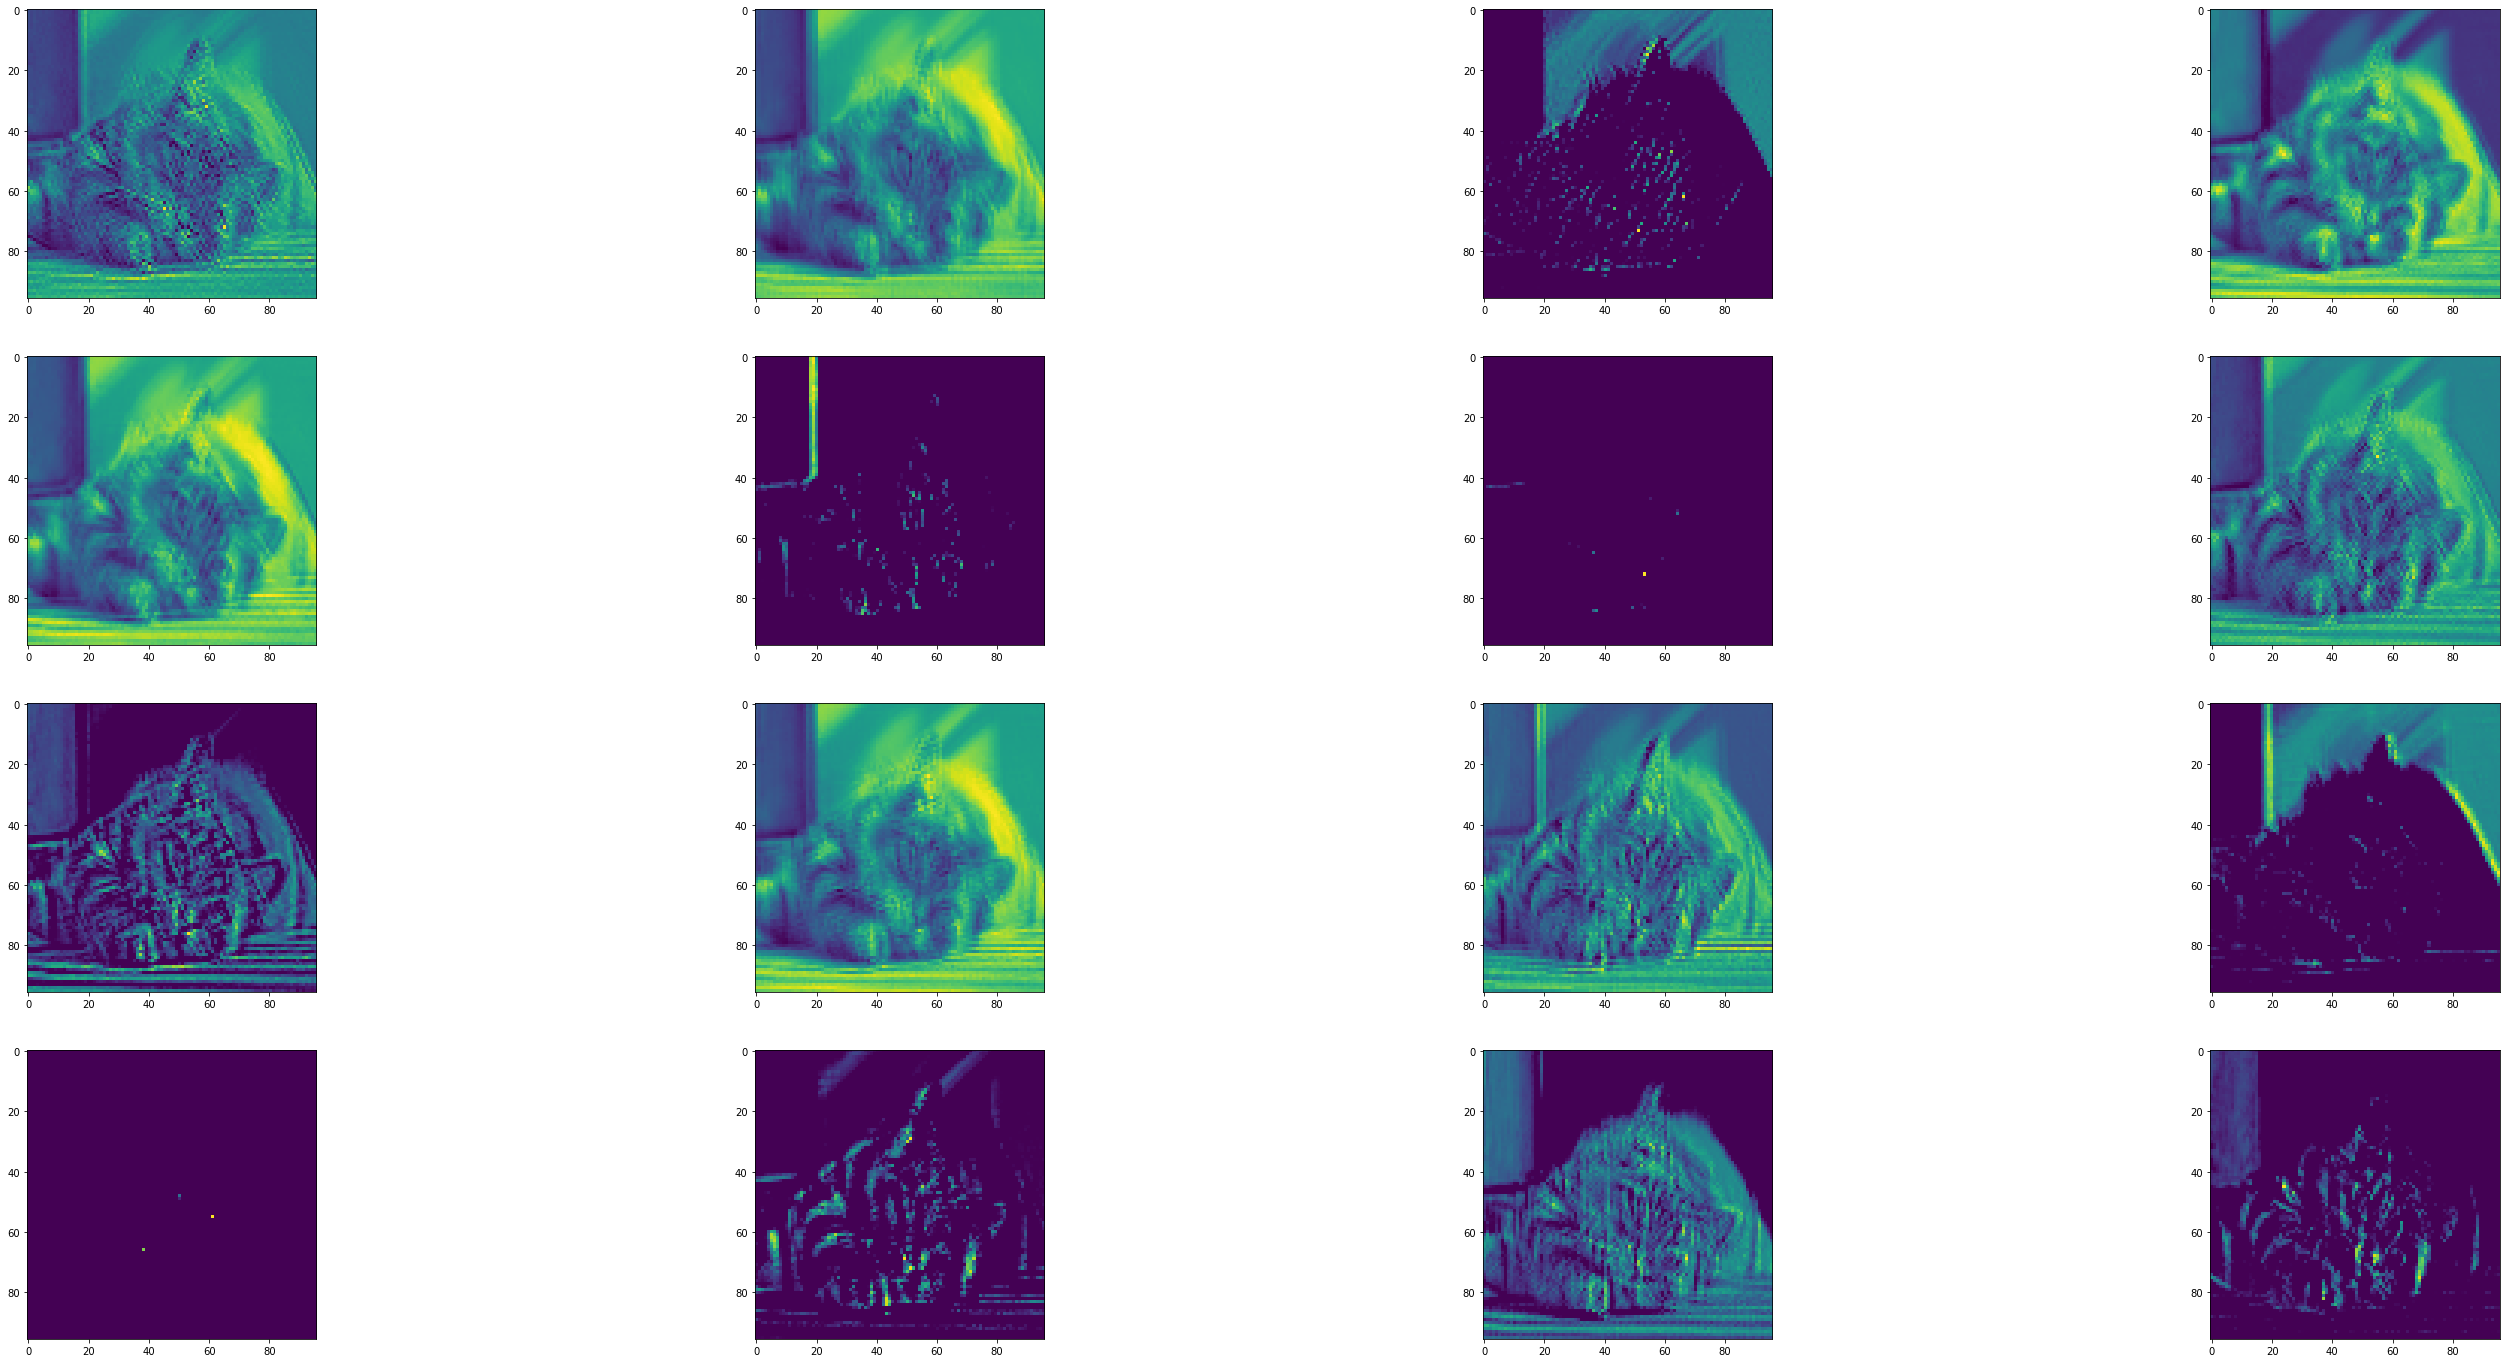

In [7]:
img=cv2.resize(img,(100,100))               
input_img= np.expand_dims(img, axis=0)      
print(input_img.shape)                      
feature=feature_map.predict(input_img)       
print(feature.shape)                            
fig= plt.figure(figsize=(50,50))
for i in range(16):
    ax=fig.add_subplot(8,4,i+1)
    ax.imshow(feature[0,:,:,i])   

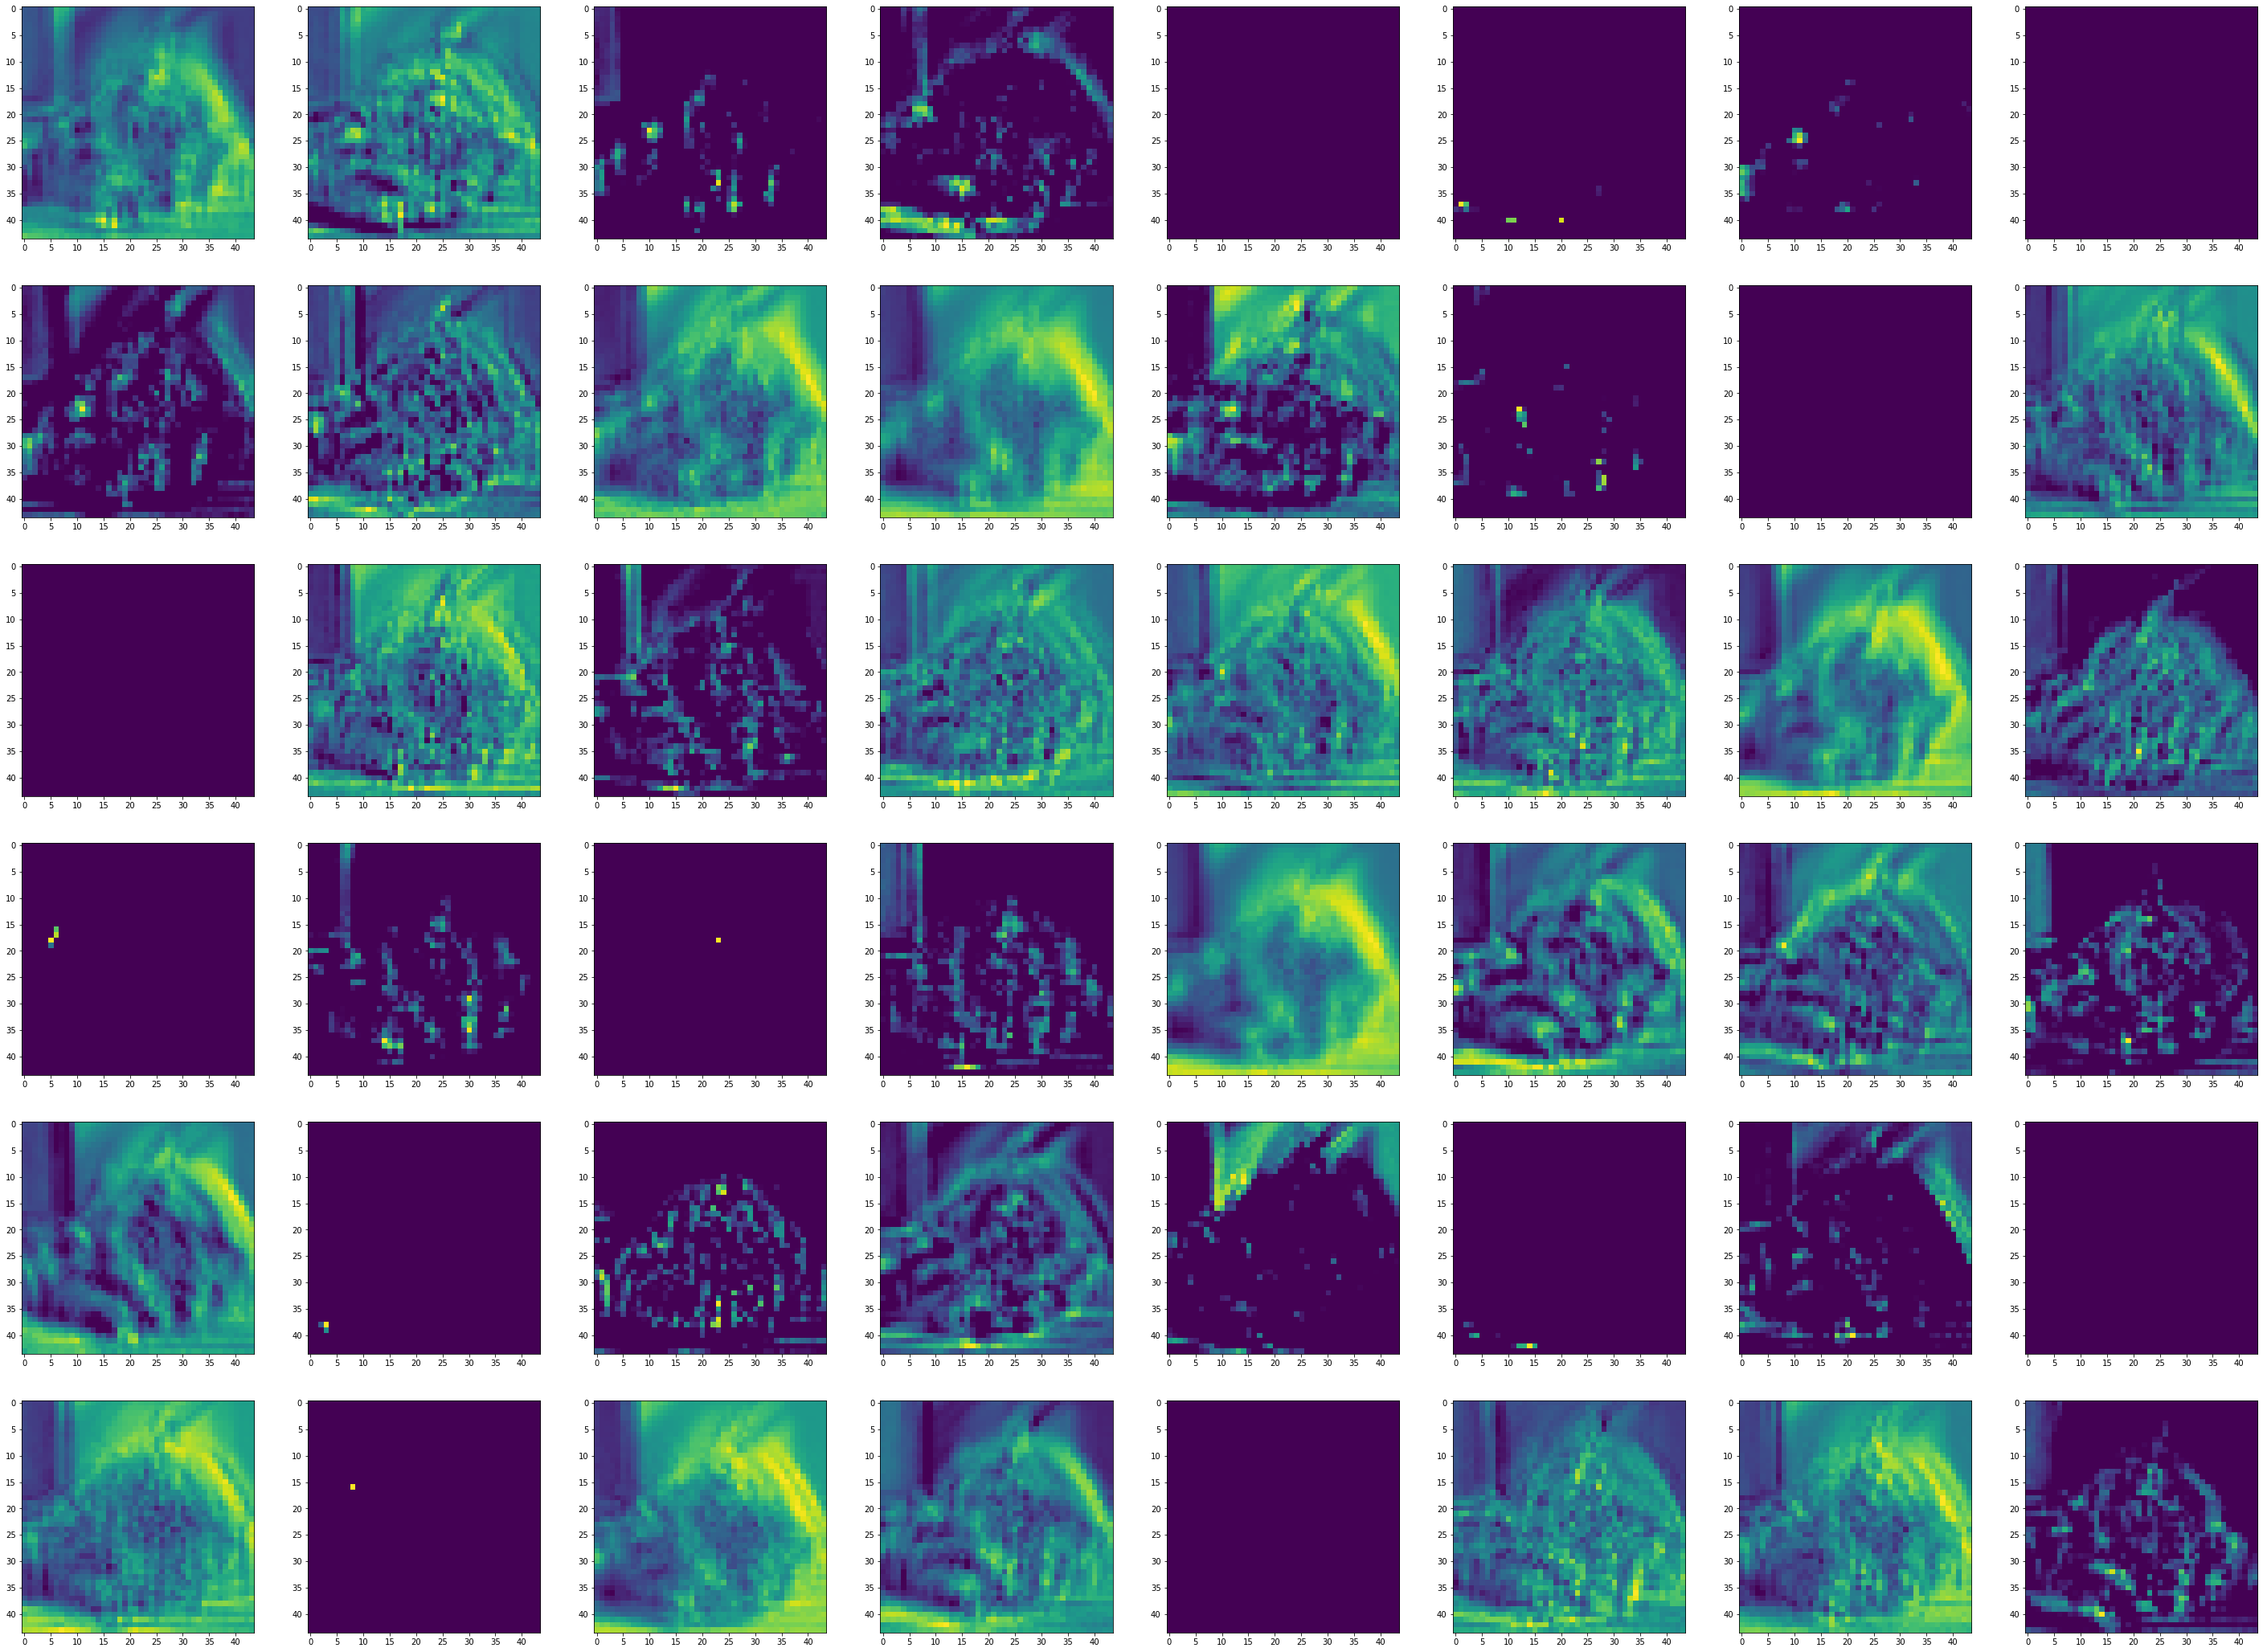

In [9]:
ins= model.inputs 
outs= model.layers[2].output  
feature_map= Model(inputs= ins, outputs= outs)  
img=cv2.imread("./data/cat.jpg")                   
img=cv2.resize(img,(100,100))               
input_img= np.expand_dims(img, axis=0)   

feature=feature_map.predict(input_img)        
fig= plt.figure(figsize=(50,50))
for i in range(48):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(feature[0,:,:,i])

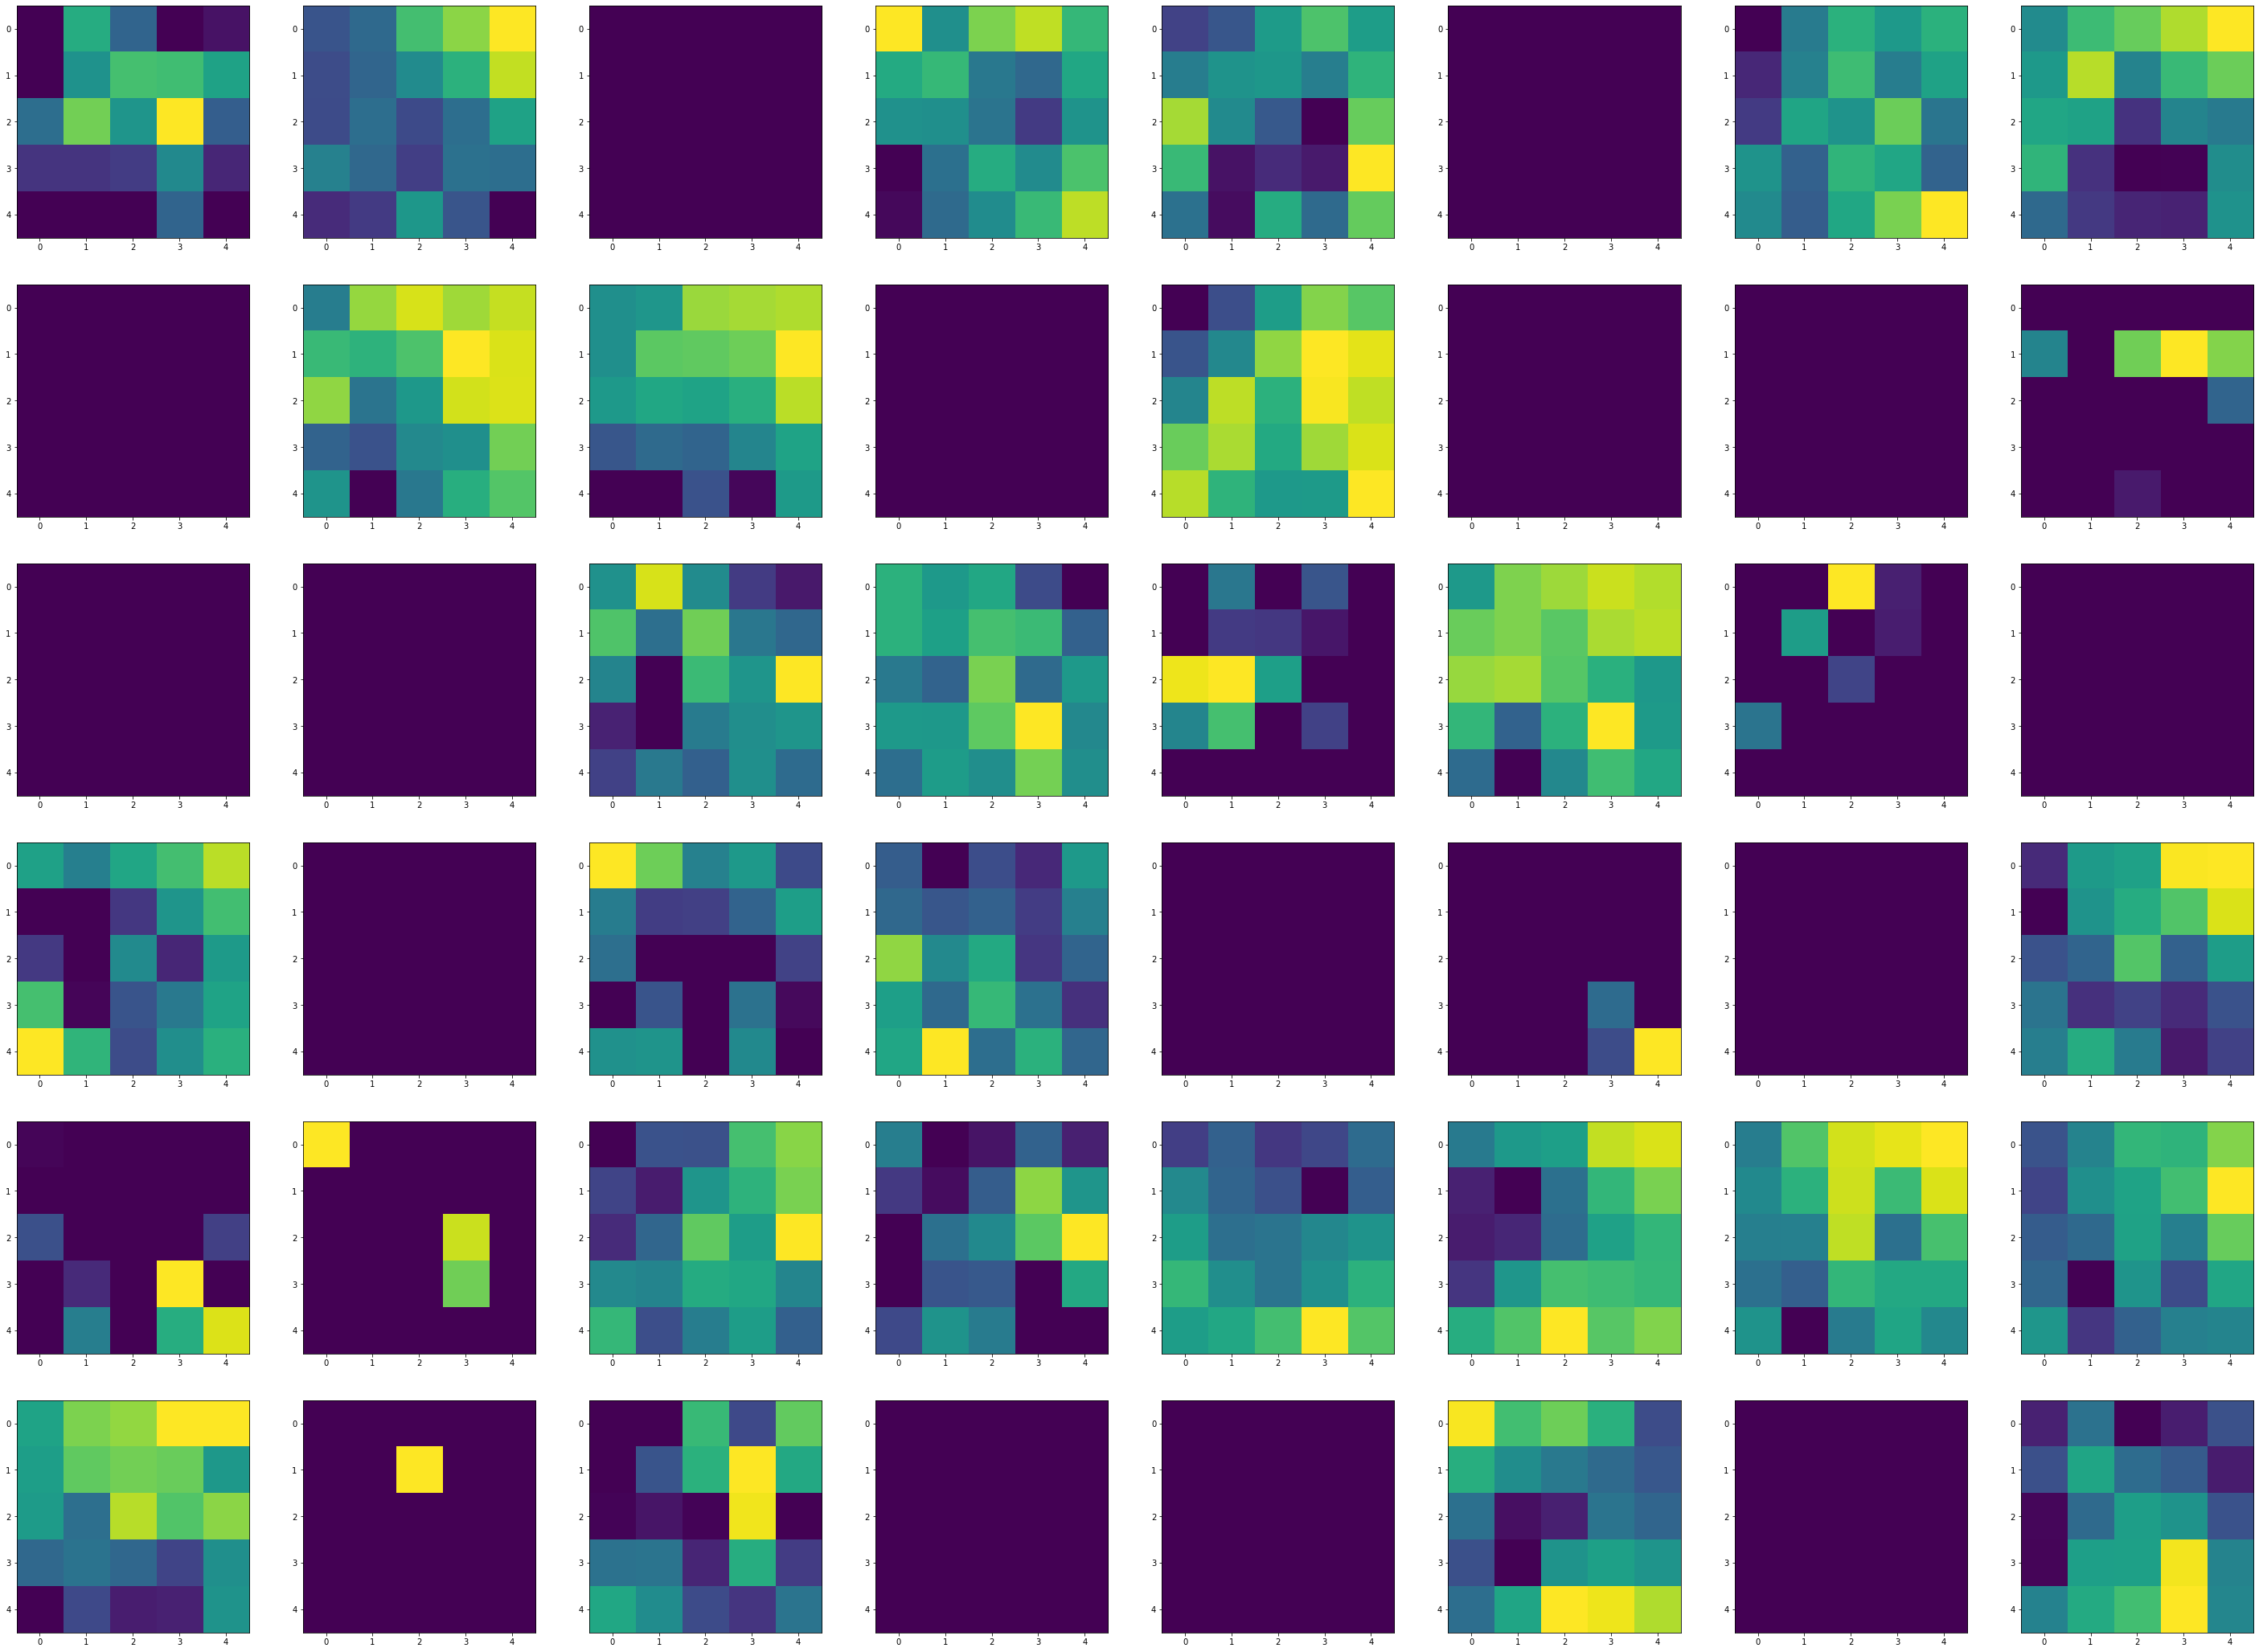

In [10]:
ins= model.inputs 
outs= model.layers[6].output  
feature_map= Model(inputs= ins, outputs= outs)  
img=cv2.imread("./data/cat.jpg")                   
img=cv2.resize(img,(100,100))               
input_img= np.expand_dims(img, axis=0)      
                      
feature=feature_map.predict(input_img)        
fig= plt.figure(figsize=(50,50))
for i in range(48):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(feature[0,:,:,i])